<a href="https://colab.research.google.com/github/Diya268/Cats-Dogs_Classification/blob/main/Cat%26DogImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Bharat Intern Internship**

## **Task 3: Cats & Dogs Image Classification**

## Kaggle Dataset Link

https://www.kaggle.com/datasets/salader/dogs-vs-cats


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:08<00:00, 205MB/s]
100% 1.06G/1.06G [00:08<00:00, 140MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras.models import Sequential

In [6]:
#generators -create batches
train_ds = keras.utils.image_dataset_from_directory (
    directory = '/content/train' ,
    labels = 'inferred' ,
    batch_size =32,
    image_size =(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory (
    directory = '/content/test' ,
    labels = 'inferred' ,
    batch_size =32,
    image_size =(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
#normalize
def process(image,label):
  image = tf.cast(image/255, tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
#creating CNN model
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 32)      128       
 chNormalization)                                                
                                                        

In [10]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [11]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 85ms/step - loss: 0.7378 - accuracy: 0.6357 - val_loss: 0.7019 - val_accuracy: 0.6506
Epoch 2/10
625/625 [==============================] - 59s 94ms/step - loss: 0.5139 - accuracy: 0.7506 - val_loss: 0.4839 - val_accuracy: 0.7620
Epoch 3/10
625/625 [==============================] - 51s 81ms/step - loss: 0.4404 - accuracy: 0.7959 - val_loss: 0.5412 - val_accuracy: 0.7474
Epoch 4/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3652 - accuracy: 0.8339 - val_loss: 0.4289 - val_accuracy: 0.8054
Epoch 5/10
625/625 [==============================] - 55s 88ms/step - loss: 0.2944 - accuracy: 0.8740 - val_loss: 0.5015 - val_accuracy: 0.7926
Epoch 6/10
625/625 [==============================] - 52s 82ms/step - loss: 0.2159 - accuracy: 0.9115 - val_loss: 0.5689 - val_accuracy: 0.8048
Epoch 7/10
625/625 [==============================] - 54s 86ms/step - loss: 0.1496 - accuracy: 0.9425 - val_loss: 0.8088 - val_accuracy:

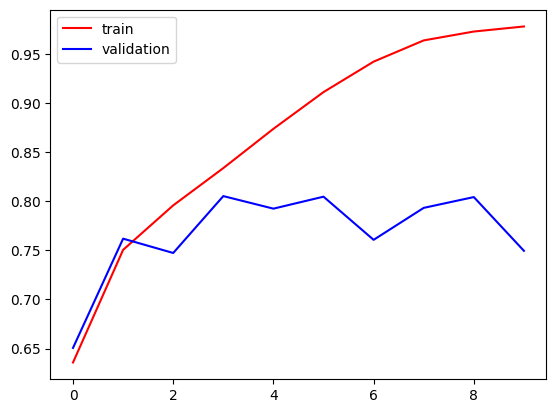

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

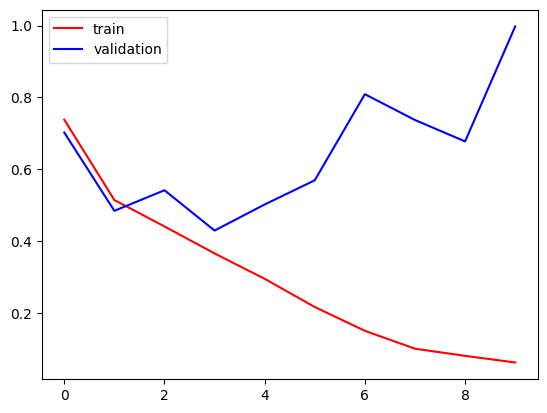

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

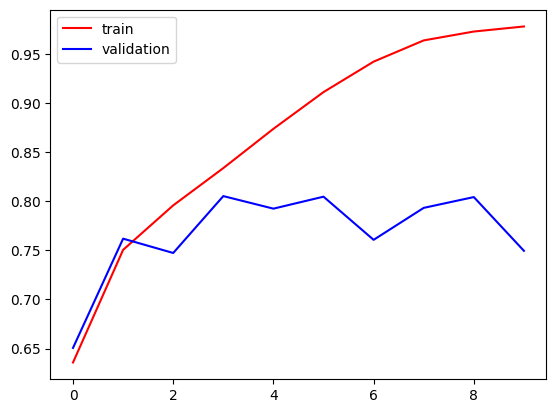

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

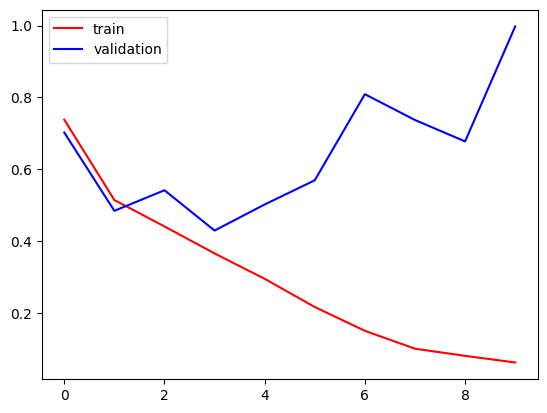

In [15]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
#need to reduce complexity
#add more data
#reducing complexity

In [17]:
import cv2

In [24]:
test_image = cv2.imread('/content/Cat image.jpg')

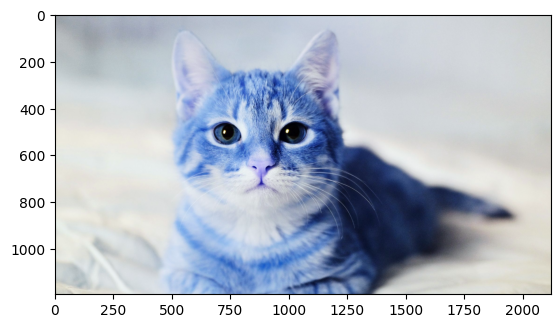

In [25]:
plt.imshow(test_image)

In [26]:
test_image.shape

(1194, 2121, 3)

In [27]:
test_image = cv2.resize(test_image,(256,256))

In [28]:
test_input = test_image.reshape(1,256,256,3)

In [29]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[0.]], dtype=float32)